In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def repair_dates(df):
    df['date_range_start'] = pd.to_datetime(df['date_range_start'], utc=True)
    df['date_range_start'] = df['date_range_start'].dt.tz_convert('US/Eastern')

In [3]:
def test(df, metric, attr, class1, class2):
    """Returns the results of two-sample T-Test and K-S test on the given
    dataframes for the given attribute."""
    df1 = df[df[attr] == class1]
    df2 = df[df[attr] == class2]
    t_results = stats.ttest_ind(df1[metric].dropna(), df2[metric].dropna())
    ks_results = stats.ks_2samp(df1[metric].dropna(), df2[metric].dropna())
    return [t_results.pvalue, ks_results.pvalue]

In [4]:
cdi_cluster_df = pd.read_csv('./exports/cdi/total_by_cluster.csv')
repair_dates(cdi_cluster_df)
cdi_cluster_df = cdi_cluster_df[cdi_cluster_df['date_range_start'].dt.year == 2020]

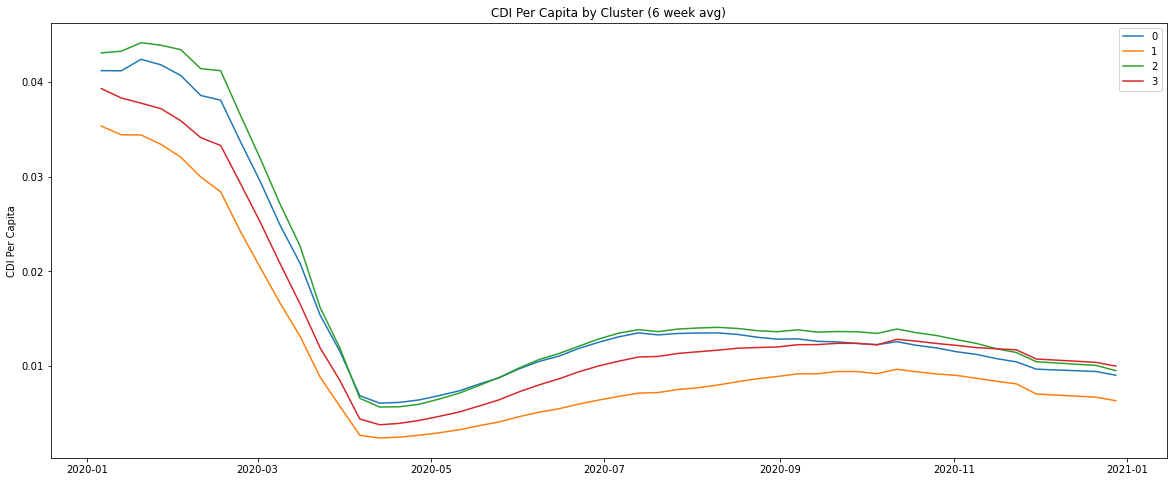

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))
for key, group in cdi_cluster_df.groupby(by=['cluster']):
    ax.plot(group['date_range_start'], group['cdi_per_capita'], label=key)
ax.set_title('CDI Per Capita by Cluster (6 week avg)')
ax.set_ylabel('CDI Per Capita')
ax.legend()
plt.show()

In [7]:
print(0, 1, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 1))
print(0, 2, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 2))
print(0, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 3))
print(1, 2, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 1, 2))
print(1, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 1, 3))
print(2, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 2, 3))

0 1 [0.015550615093781714, 4.047604718242212e-08]
0 2 [0.6876353132530464, 0.039194586195352224]
0 3 [0.387016120755456, 0.06779471096995852]
1 2 [0.006258681322400548, 1.0624962385385807e-08]
1 3 [0.10091126567135646, 1.5814255608393076e-06]
2 3 [0.2119915519395732, 0.0013147736033165794]


We can reject the hypothesis that cluster 0 and 1 follow the same distribution.\
We can reject the hypothesis that cluster 1 and 2 follow the same distribution.

In [8]:
cdi_cluster_diff_df = pd.read_csv('./exports/cdi/diff_by_cluster.csv')
repair_dates(cdi_cluster_diff_df)

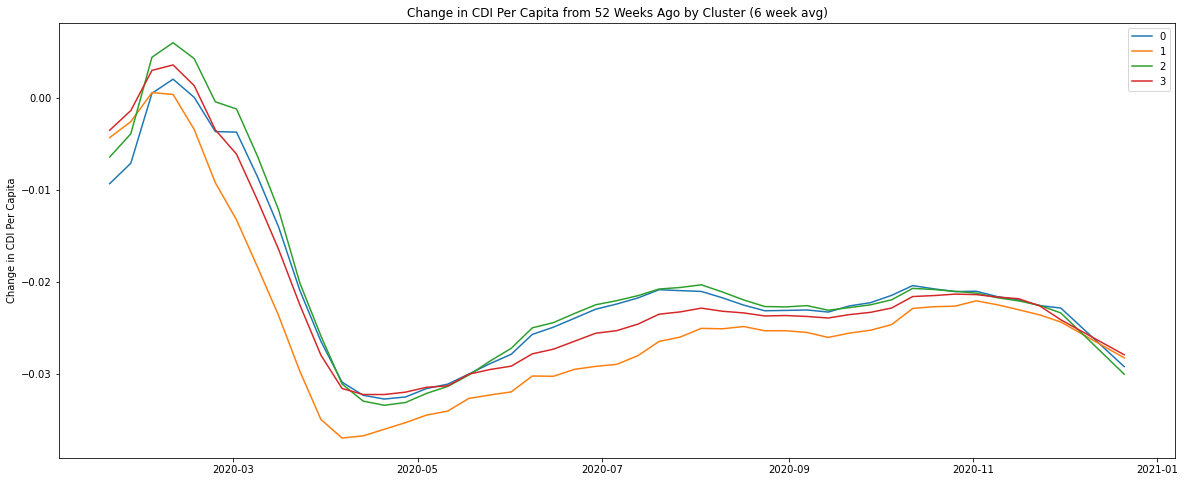

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
for key, group in cdi_cluster_diff_df.groupby(by=['cluster']):
    ax.plot(group['date_range_start'], group['cdi_per_capita'], label=key)
ax.set_title(
    'Change in CDI Per Capita from 52 Weeks Ago by Cluster (6 week avg)')
ax.set_ylabel('Change in CDI Per Capita')
ax.legend()
plt.show()

In [10]:
print(0, 1, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 1))
print(0, 2, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 2))
print(0, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 3))
print(1, 2, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 1, 2))
print(1, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 1, 3))
print(2, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 2, 3))

0 1 [0.07095976294035612, 0.0008060279194562179]
0 2 [0.7379812738424387, 0.9964306313659149]
0 3 [0.7583511660736997, 0.054452894761163696]
1 2 [0.044366096056982746, 0.00033684748872850594]
1 3 [0.14768355019522755, 0.03035107595148269]
2 3 [0.5412690004181852, 0.03035107595148269]


We can reject the hypothesis that cluster 1 and 2 follow the same distribution.